##Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import confusion_matrix , f1_score,accuracy_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_classif, VarianceThreshold,RFE,RFECV,SelectFromModel,SequentialFeatureSelector,chi2

In [4]:
#reading csv file into dataframe
df = pd.read_csv("/content/MCSDatasetNEXTCONLab.csv")
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [5]:
#counts of unique values of Ligitimacy column
df.Ligitimacy.value_counts()

1    12587
0     1897
Name: Ligitimacy, dtype: int64

In [6]:
#counts of unique values of Day column
df.Day.value_counts()

2    2483
1    2467
3    2460
5    2457
0    2305
4    2279
6      33
Name: Day, dtype: int64

# ***1)***



## **(a)** training and test datasets for remaining parts according to day feature

In [7]:
train_data = df[df["Day"].isin([0, 1, 2])]
train_data = train_data.drop(['ID','Day'],axis=1)
train_data

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,45.442142,-75.303369,4,13,40,40,9,91,0,131380,1
1,45.442154,-75.304366,4,23,40,30,9,91,0,131380,1
2,45.442104,-75.303963,4,33,40,20,9,91,0,121996,1
3,45.441868,-75.303577,4,43,40,10,9,91,0,121996,1
4,45.447727,-75.147722,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...
14479,45.445303,-75.165596,1,18,20,20,10,80,0,131397,1
14480,45.445574,-75.165168,1,28,20,10,10,80,0,131397,1
14481,45.436682,-75.152416,12,21,30,30,4,63,0,122015,1
14482,45.436978,-75.153278,12,31,30,20,4,63,0,122015,1


In [8]:
train_data.Ligitimacy.value_counts()

1    6298
0     957
Name: Ligitimacy, dtype: int64

In [9]:
test_data = df[df["Day"] == 3]
test_data = test_data.drop(['ID','Day'],axis=1)
test_data

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
16,45.410236,-75.208755,22,25,30,30,10,32,0,75088,1
17,45.409787,-75.208022,22,35,30,20,10,32,0,75088,1
18,45.409407,-75.207825,22,45,30,10,10,32,0,65704,1
26,45.544018,-75.146364,20,39,20,20,2,82,0,300312,1
27,45.544576,-75.146364,20,49,20,10,2,82,0,300312,1
...,...,...,...,...,...,...,...,...,...,...,...
14429,45.541816,-75.177356,4,36,60,10,9,43,0,300308,1
14445,45.461207,-75.209171,3,4,40,40,4,60,0,159544,1
14446,45.461241,-75.209067,3,14,40,30,4,60,0,159544,1
14447,45.461261,-75.209205,3,24,40,20,4,60,0,159544,1


In [10]:
test_data.Ligitimacy.value_counts()

1    2148
0     312
Name: Ligitimacy, dtype: int64

In [11]:
X_train = train_data.iloc[: , 0 : -1 ]
X_test = test_data.iloc[: , 0 : -1 ]
Y_train = train_data.iloc[: , -1]
Y_test = test_data.iloc[: , -1]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7255, 10)
(2460, 10)
(7255,)
(2460,)


In [12]:
X_train

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.442142,-75.303369,4,13,40,40,9,91,0,131380
1,45.442154,-75.304366,4,23,40,30,9,91,0,131380
2,45.442104,-75.303963,4,33,40,20,9,91,0,121996
3,45.441868,-75.303577,4,43,40,10,9,91,0,121996
4,45.447727,-75.147722,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...
14479,45.445303,-75.165596,1,18,20,20,10,80,0,131397
14480,45.445574,-75.165168,1,28,20,10,10,80,0,131397
14481,45.436682,-75.152416,12,21,30,30,4,63,0,122015
14482,45.436978,-75.153278,12,31,30,20,4,63,0,122015


In [13]:
Y_train

0        1
1        1
2        1
3        1
4        1
        ..
14479    1
14480    1
14481    1
14482    1
14483    1
Name: Ligitimacy, Length: 7255, dtype: int64

##**(b)** confusion matrixes and F1 scores of NB and KNN classifier

In [14]:
def confusion_mx (y_test,y_pred,label):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix {label}',size= 10)
    plt.show()

In [15]:
def BNB(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train , y_train)
    y_pred = BNB.predict(x_test)
    confusion_mx(y_test , y_pred , "Bernoulli Naive Bayes Predictions")
    f1 = f1_score(y_test, y_pred )
    print("F1-Score is : ",f1)
    return f1

In [16]:
def BNB_acc(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train , y_train)
    y_pred = BNB.predict(x_test)
    confusion_mx(y_test , y_pred , "Bernoulli Naive Bayes Predictions")
    acc = accuracy_score(y_test, y_pred )
    print("Accuracy-Score is : ",acc)
    return acc

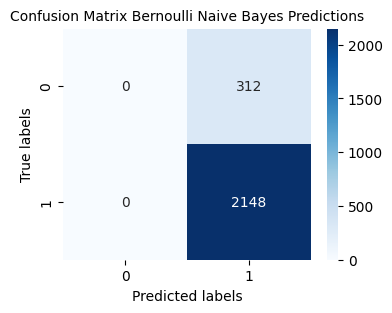

F1-Score is :  0.9322916666666667


In [17]:
BNB_F1 = BNB(X_train , X_test , Y_train , Y_test)

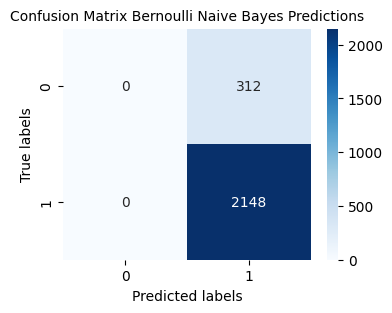

Accuracy-Score is :  0.8731707317073171


In [18]:
BNB_acc1 = BNB_acc(X_train , X_test , Y_train , Y_test)

In [19]:
def KNN(x_train , x_test , y_train , y_test ):
      knn = KNeighborsClassifier(n_neighbors = 5)
      model = knn.fit(x_train , y_train)
      knn_pred = model.predict(x_test)
      confusion_mx(y_test , knn_pred , "KNN Prediction")
      f1 = f1_score(y_test, knn_pred )
      print("F1-Score is : ",f1)
      return f1

In [20]:
def KNN_acc(x_train , x_test , y_train , y_test ):
      knn = KNeighborsClassifier(n_neighbors = 5)
      model = knn.fit(x_train , y_train)
      knn_pred = model.predict(x_test)
      confusion_mx(y_test , knn_pred , "KNN Prediction")
      acc = accuracy_score(y_test, knn_pred )
      print("Accuracy-Score is : ",acc)
      return acc

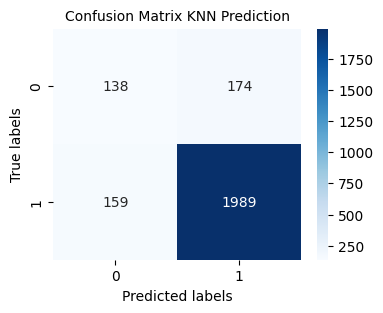

F1-Score is :  0.9227557411273487


In [21]:
KNN_F1 = KNN(X_train , X_test , Y_train , Y_test)

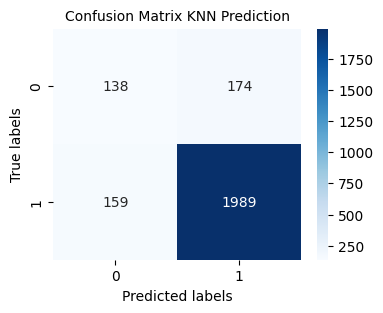

Accuracy-Score is :  0.8646341463414634


In [22]:
KNN_acc1 = KNN_acc(X_train , X_test , Y_train , Y_test)

In [23]:
def draw_TSNE(X_train, Y_train , palette,title):
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(X_train)
  dftsne = pd.DataFrame(X_2d)
  dftsne['cluster'] = Y_train
  dftsne.columns = ['Dimension_1','Dimension_2','cluster']
  plt.figure(figsize=(6, 5))
  sns.set(rc={ 'axes.facecolor':'aliceblue', 'figure.facecolor':'white'})
  sns.scatterplot(data = dftsne , x = 'Dimension_1', y = 'Dimension_2', hue = 'cluster' , legend = "full" , alpha = 1 , palette=palette)
  plt.title(title)
  plt.legend()
  plt.show()

##**(c)** 2D TSNE Plot for original Training and Testing sets


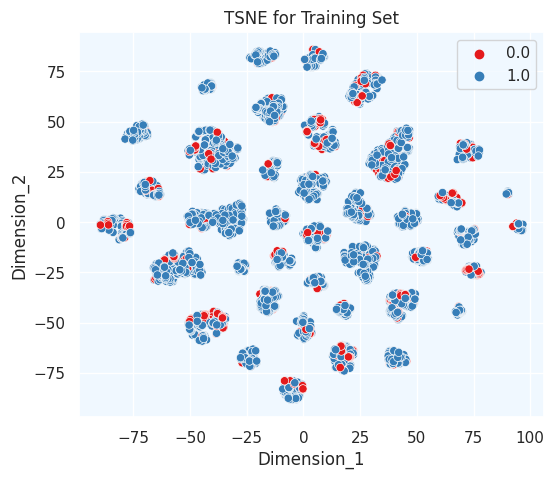

In [24]:
draw_TSNE(X_train , Y_train , "Set1",'TSNE for Training Set')

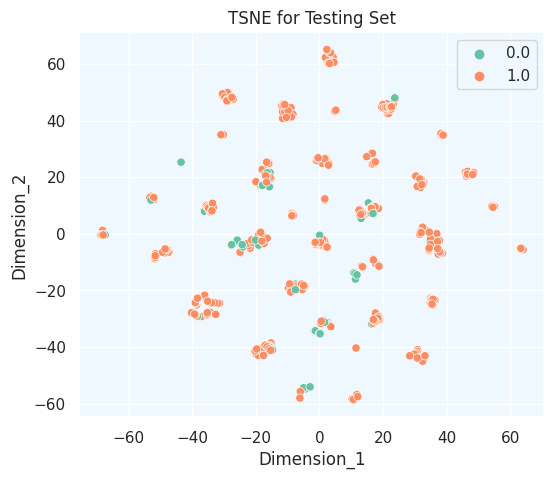

In [25]:
draw_TSNE(X_test , Y_test , "Set2",'TSNE for Testing Set')

# ***2)*** Dimensionality Reduction methods

##**(a)** number of components vs f1 score for PCA and AE using (NB and KNN)

In [26]:
def N_PCA(X_train , X_test , Y_train , Y_test):
  n_list = [2,3,4,5,6,7,8,9,10]
  f1_list_bnb ,f1_list_knn = [] , []
  BNB = BernoulliNB()
  knn = KNeighborsClassifier(n_neighbors = 5)
  # PCA
  for i in n_list:
    pca = PCA(n_components = i)
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)
    #Bernoulli Naive Bayes
    BNB.fit(x_train_pca , Y_train)
    bernoulli_nb_pred = BNB.predict(x_test_pca)
    f1_bnb = f1_score(Y_test, bernoulli_nb_pred) * 100
    f1_list_bnb.append(f1_bnb)

    # K Nearest Neighbors
    KNN = knn.fit(x_train_pca , Y_train)
    knn_pred = KNN.predict(x_test_pca)
    f1_knn = f1_score(Y_test, knn_pred ) * 100
    f1_list_knn.append(f1_knn)
  BNB_results = ["{:.2f}".format(result) for result in f1_list_bnb ]
  print("F1-Score for PCA data for Bernoulli Naive Bayes Model : \n\n" , BNB_results , " % \n\n")
  print("The Max F1 score for Bernoulli Naive Bayes Model : " , max(BNB_results) , "\n\nAnd the number of components : " , n_list[BNB_results.index(max(BNB_results))])
  print("\n\n--------------------------------------------------------")
  KNN_results = ["{:.2f}".format(result) for result in f1_list_knn ]
  print("\n\nF1-Score for PCA data for K Nearest Neighbors Model : \n\n" , KNN_results , " % \n\n")
  print("The Max F1 score for K Nearest Neighbors Model : " , max(KNN_results) , "\n\nAnd the number of components : " , n_list[KNN_results.index(max(KNN_results))])

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.patch.set_facecolor('white')
  fig.suptitle('PCA')

  axes[0].plot(n_list , f1_list_bnb , "b" , label = "Bernoulli Naive Bayes results" , marker = "." )
  axes[0].axhline(y = BNB_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[0].set_title("Bernoulli Naive Bayes")
  axes[0].grid(True)
  # --------------------------------------
  axes[1].plot(n_list , f1_list_knn , "b" , label = "PCA results" , marker = "." )
  axes[1].axhline(y = KNN_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[1].set_title("K Nearest Neighbors")
  axes[1].grid(True)

  fig.text(0.5, -0.04, 'Number of Components', ha='center')
  fig.text(-0.04, 0.5, 'F1 Score', va='center', rotation='vertical')

  plt.tight_layout()
  plt.show()



F1-Score for PCA data for Bernoulli Naive Bayes Model : 

 ['93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.06', '93.19', '93.32']  % 


The Max F1 score for Bernoulli Naive Bayes Model :  93.32 

And the number of components :  10


--------------------------------------------------------


F1-Score for PCA data for K Nearest Neighbors Model : 

 ['94.81', '93.92', '92.82', '92.37', '92.39', '92.25', '92.28', '92.28', '92.28']  % 


The Max F1 score for K Nearest Neighbors Model :  94.81 

And the number of components :  2


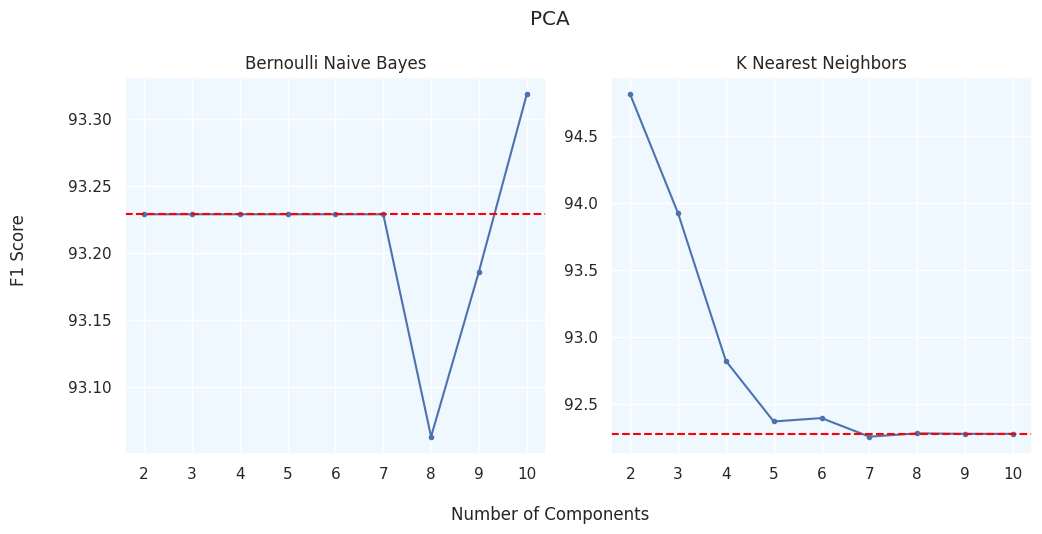

In [27]:
N_PCA(X_train , X_test , Y_train , Y_test )

In [28]:
def train_encoder (X_train , i):
  autoencoder = MLPRegressor(alpha=1e-15,hidden_layer_sizes=[10,8,6,4,i],random_state=0, max_iter=10000)
  autoencoder.fit(X_train, X_train)
  return autoencoder
def transform_encoder(autoencoder, data):
  data = autoencoder.predict(data)
  return data

In [86]:
def N_AE(X_train , X_test , Y_train , Y_test):
  n_list = [2,3,4,5,6,7,8,9,10]
  f1_list_bnb ,f1_list_knn = [] , []
  BNB = BernoulliNB()
  knn = KNeighborsClassifier(n_neighbors = 5)
  # Auto Encoder
  for i in n_list:
    encoder = train_encoder (X_train , i)
    x_train_ae = transform_encoder(encoder , X_train)
    x_test_pae = transform_encoder(encoder , X_test)
    #Bernoulli Naive Bayes
    BNB.fit(x_train_ae , Y_train)
    bernoulli_nb_pred = BNB.predict(x_test_pae)
    f1_bnb = f1_score(Y_test, bernoulli_nb_pred) * 100
    f1_list_bnb.append(f1_bnb)

    # K Nearest Neighbors
    KNN = knn.fit(x_train_ae , Y_train)
    knn_pred = KNN.predict(x_test_pae)
    f1_knn = f1_score(Y_test, knn_pred ) * 100
    f1_list_knn.append(f1_knn)

  BNB_results = ["{:.2f}".format(result) for result in f1_list_bnb ]
  print("F1-Score for Auto Encoder data for Bernoulli Naive Bayes Model : \n\n" , BNB_results , " % \n\n")
  print("The Max F1 score for Bernoulli Naive Bayes Model : " , max(BNB_results) , "\n\nAnd the number of components : " , n_list[BNB_results.index(max(BNB_results))])
  print("\n\n--------------------------------------------------------")
  KNN_results = ["{:.2f}".format(result) for result in f1_list_knn ]
  print("\n\nF1-Score for Auto Encoder data for K Nearest Neighbors Model : \n\n" , KNN_results , " % \n\n")
  print("The Max F1 score for K Nearest Neighbors Model : " , max(KNN_results) , "\n\nAnd the number of components : " , n_list[KNN_results.index(max(KNN_results))])

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.patch.set_facecolor('white')
  fig.suptitle('Auto Encoder')

  axes[0].plot(n_list , f1_list_bnb , "b" , label = "Bernoulli Naive Bayes results" , marker = "." )
  axes[0].axhline(y = BNB_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[0].set_title("Bernoulli Naive Bayes")
  axes[0].grid(True)
  # --------------------------------------
  axes[1].plot(n_list , f1_list_knn , "b" , label = "PCA results" , marker = "." )
  axes[1].axhline(y = KNN_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[1].set_title("K Nearest Neighbors")
  axes[1].grid(True)

  fig.text(0.5, -0.04, 'Number of Components', ha='center')
  fig.text(-0.04, 0.5, 'F1 Score', va='center', rotation='vertical')

  plt.tight_layout()
  plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-Score for Auto Encoder data for Bernoulli Naive Bayes Model : 

 ['93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23']  % 


The Max F1 score for Bernoulli Naive Bayes Model :  93.23 

And the number of components :  2


--------------------------------------------------------


F1-Score for Auto Encoder data for K Nearest Neighbors Model : 

 ['92.38', '93.23', '93.23', '91.39', '92.61', '91.72', '92.38', '92.00', '91.89']  % 


The Max F1 score for K Nearest Neighbors Model :  93.23 

And the number of components :  3


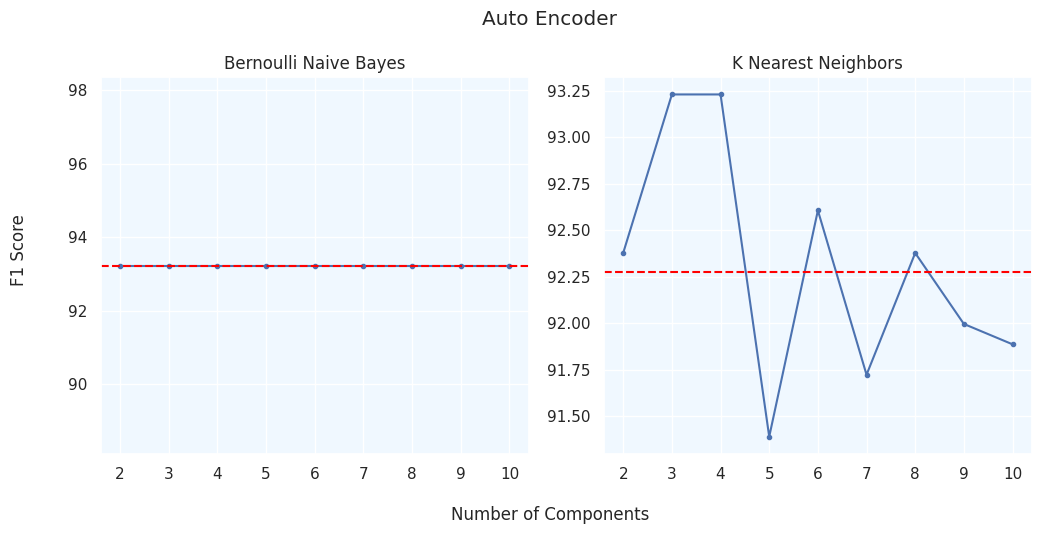

In [87]:
N_AE(X_train , X_test , Y_train , Y_test)

##**(b)**  2D TSNE plots for the best performance (DR) method based on  f1 score of(NB and KNN)

In [31]:
pca = PCA(n_components = 2 , random_state = 0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

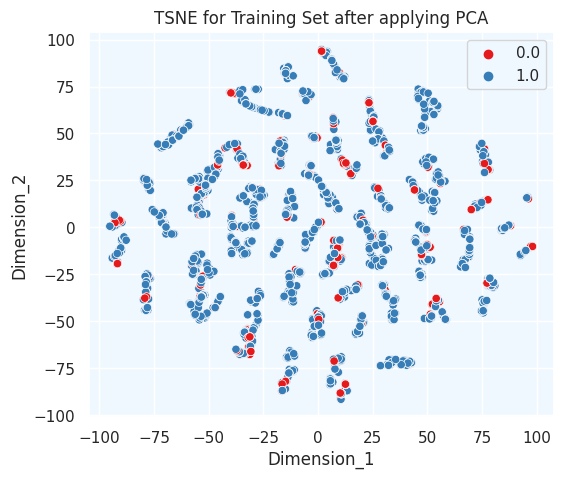

In [32]:
draw_TSNE(X_train_pca , Y_train , "Set1",'TSNE for Training Set after applying PCA')

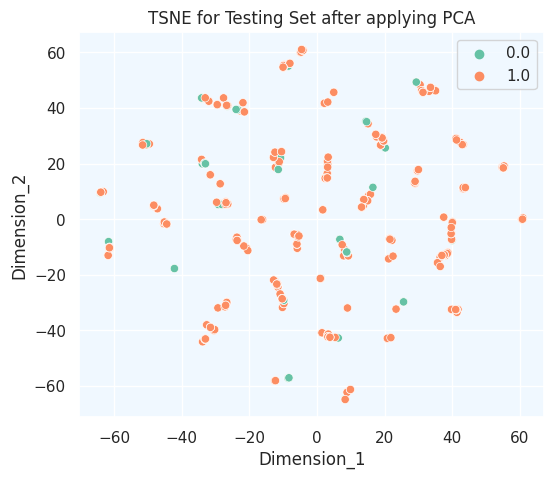

In [33]:
draw_TSNE(X_test_pca , Y_test , "Set2",'TSNE for Testing Set after applying PCA')

#**3)  Feature Selection methods**

##(a) Filter Methods with improved base line performance

In [84]:
# using Mutual_Information filter method to Find the best number of features based on both, the NB and KNN classifiers f1 scores
def Mutual_Info(X_train, Y_train,X_test, Y_test):

  num_features_list = range(1, 10)
  f1_scores_nb = []
  f1_scores_knn = []
  BNB = BernoulliNB()
  knn = KNeighborsClassifier()

  for num_features in num_features_list:
    # Apply SelectKBest with Mutual_Information
    selector = SelectKBest(score_func=mutual_info_classif, k='all')
    X_train_selected = selector.fit_transform(X_train, Y_train)
    X_test_selected = selector.transform(X_test)

    # Train NB classifier

    BNB.fit(X_train_selected, Y_train)
    y_pred_nb = BNB.predict(X_test_selected)
    f1_nb = f1_score(Y_test, y_pred_nb)* 100
    f1_scores_nb.append(f1_nb)

    # Train KNN classifier
    knn.fit(X_train_selected, Y_train)
    y_pred_knn = knn.predict(X_test_selected)
    f1_knn = f1_score(Y_test, y_pred_knn)* 100
    f1_scores_knn.append(f1_knn)

  # print f1 score for different num of features  after applying Mutual_Information for Bernoulli Naive Bayes Model
  BNB_results = ["{:.2f}".format(result) for result in f1_scores_nb ]
  print("F1-Score after applying Mutual_Information for Bernoulli Naive Bayes Model : \n\n" , BNB_results , " % \n\n")
  print("The Max F1 score for Bernoulli Naive Bayes Model : " , max(BNB_results) , "\n\nAnd the best number of features : " , num_features_list[BNB_results.index(max(BNB_results))])
  print("\n\n--------------------------------------------------------")
  # print f1 score for different num of features  after applying Mutual_Information for K nearest neigbour model
  KNN_results = ["{:.2f}".format(result) for result in f1_scores_knn ]
  print("\n\nF1-Score after applying Mutual_Information for K Nearest Neighbours Model : \n\n" , KNN_results , " % \n\n")
  print("The Max F1 score for K Nearest Neighbours Model : " , max(KNN_results) , "\n\nAnd the best number of features : " , num_features_list[KNN_results.index(max(KNN_results))])

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.patch.set_facecolor('white')
  fig.suptitle('Mutual_Information')

  axes[0].plot(num_features_list , f1_scores_nb , "b" , label = "Bernoulli Naive Bayes results" , marker = "." )
  axes[0].axhline(y = BNB_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[0].set_title("Bernoulli Naive Bayes")
  axes[0].grid(True)
  # --------------------------------------
  axes[1].plot(num_features_list , f1_scores_knn , "b" , label = "PCA results" , marker = "." )
  axes[1].axhline(y = KNN_F1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[1].set_title("K Nearest Neighbours")
  axes[1].grid(True)

  fig.text(0.5, -0.04, 'Number of Components', ha='center')
  fig.text(-0.04, 0.5, 'F1 Score', va='center', rotation='vertical')

  plt.tight_layout()
  plt.show()


F1-Score after applying Mutual_Information for Bernoulli Naive Bayes Model : 

 ['93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23', '93.23']  % 


The Max F1 score for Bernoulli Naive Bayes Model :  93.23 

And the best number of features :  1


--------------------------------------------------------


F1-Score after applying Mutual_Information for K Nearest Neighbours Model : 

 ['94.81', '94.81', '94.81', '94.81', '94.81', '94.81', '94.81', '94.81', '94.81']  % 


The Max F1 score for K Nearest Neighbours Model :  94.81 

And the best number of features :  1


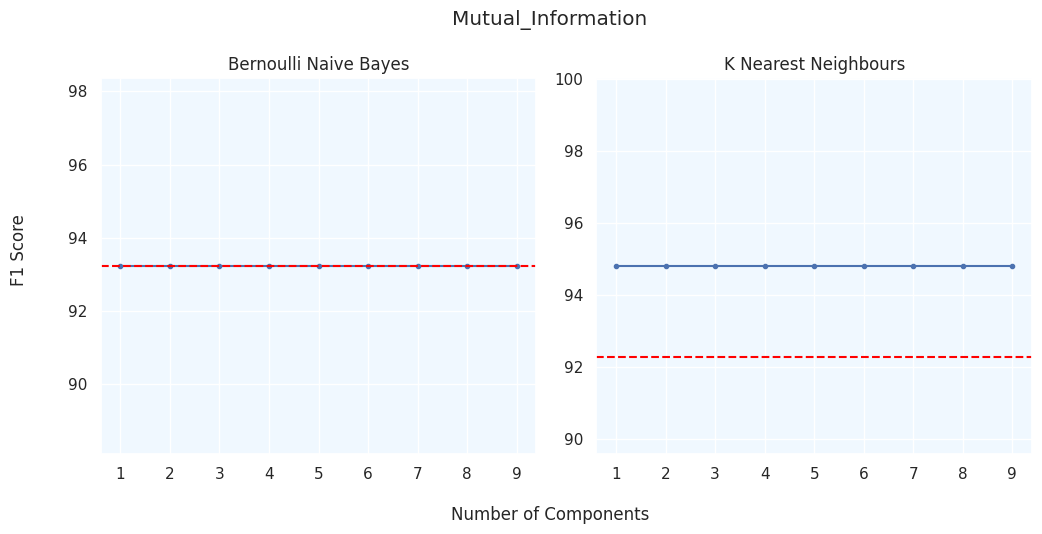

In [85]:
Mutual_Info(X_train_pca, Y_train,X_test_pca, Y_test)

##(b) Wrapper Methods

In [57]:
# Wrapper feature selection using Backward Feature Elimination (BFE) to Find the best number of features based on both, the NB and KNN classifiers with accuracy
def select_features_backward_acc(X_train, Y_train,X_test, Y_test):

  num_features_list = range(1, 10)
  acc_scores_nb = []
  acc_scores_knn = []
  BNB = BernoulliNB()
  knn = KNeighborsClassifier()

  for num_features in num_features_list:
    # Apply SelectKBest with Information Gain
    selector_nb =  SequentialFeatureSelector(BNB, n_features_to_select=num_features, direction="backward")
    selector_knn =  SequentialFeatureSelector(knn, n_features_to_select=num_features, direction="backward")
    X_train_selected_nb = selector_nb.fit_transform(X_train, Y_train)
    X_test_selected_nb = selector_nb.transform(X_test)
    X_train_selected_knn = selector_knn.fit_transform(X_train, Y_train)
    X_test_selected_knn = selector_knn.transform(X_test)

    # Train NB classifier

    BNB.fit(X_train_selected_nb, Y_train)
    y_pred_nb = BNB.predict(X_test_selected_nb)
    acc_nb = accuracy_score(Y_test, y_pred_nb)* 100
    acc_scores_nb.append(acc_nb)

    # Train KNN classifier
    knn.fit(X_train_selected_knn, Y_train)
    y_pred_knn = knn.predict(X_test_selected_knn)
    acc_knn = accuracy_score(Y_test, y_pred_knn)* 100
    acc_scores_knn.append(acc_knn)


  BNB_results = ["{:.2f}".format(result) for result in acc_scores_nb ]
  print("Accuracy-Score after applying Backward Feature Elimination for Bernoulli Naive Bayes Model : \n\n" , BNB_results , " % \n\n")
  print("The Max Accuracy score for Bernoulli Naive Bayes Model : " , max(BNB_results) , "\n\nAnd the best number of features : " , num_features_list[BNB_results.index(max(BNB_results))])
  print("\n\n--------------------------------------------------------")
  KNN_results = ["{:.2f}".format(result) for result in acc_scores_knn ]
  print("\n\n Accuracy-Score after applying Backward Feature Elimination for K Nearest Neighbors Model : \n\n" , KNN_results , " % \n\n")
  print("The Max Accuracy score for K Nearest Neighbors Model : " , max(KNN_results) , "\n\nAnd the best number of features : " , num_features_list[KNN_results.index(max(KNN_results))])

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.patch.set_facecolor('white')
  fig.suptitle('Backward Feature Elimination (BFE)')

  axes[0].plot(num_features_list , acc_scores_nb , "b" , label = "Bernoulli Naive Bayes results" , marker = "." )
  axes[0].axhline(y = BNB_acc1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[0].set_title("Bernoulli Naive Bayes")
  axes[0].grid(True)
  # --------------------------------------
  axes[1].plot(num_features_list , acc_scores_knn , "b" , label = "PCA results" , marker = "." )
  axes[1].axhline(y = KNN_acc1*100 , color = "red" , linestyle = "--" , label = "Baseline Performance")
  axes[1].set_title("K Nearest Neighbors")
  axes[1].grid(True)

  fig.text(0.5, -0.04, 'Number of Components', ha='center')
  fig.text(-0.04, 0.5, 'Accuracy Score', va='center', rotation='vertical')

  plt.tight_layout()
  plt.show()


Accuracy-Score after applying Backward Feature Elimination for Bernoulli Naive Bayes Model : 

 ['87.32', '87.32', '87.32', '87.32', '87.32', '87.32', '87.32', '87.32', '87.32']  % 


The Max Accuracy score for Bernoulli Naive Bayes Model :  87.32 

And the best number of features :  1


--------------------------------------------------------


 Accuracy-Score after applying Backward Feature Elimination for K Nearest Neighbors Model : 

 ['88.01', '97.60', '96.95', '97.20', '95.45', '95.81', '92.93', '89.96', '88.86']  % 


The Max Accuracy score for K Nearest Neighbors Model :  97.60 

And the best number of features :  2


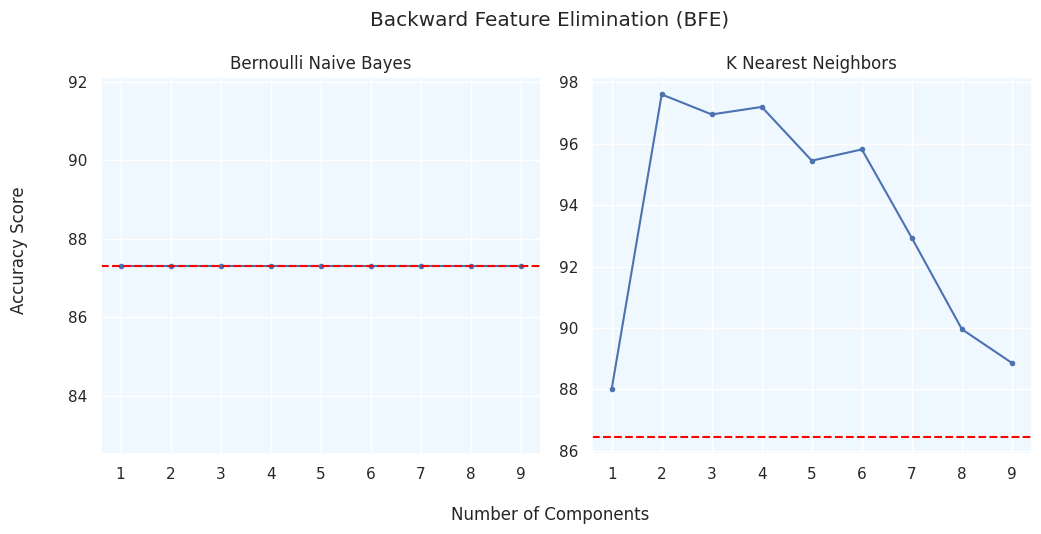

In [58]:
select_features_backward_acc(X_train, Y_train,X_test, Y_test)

##(c) 2D TSNE plots for best method"Backward Feature Elimination" when num of features = 2

In [69]:
knn = KNeighborsClassifier()
selector_knn =  SequentialFeatureSelector(knn, n_features_to_select=2, direction="backward")
X_train_selected_knn = selector_knn.fit_transform(X_train, Y_train)
X_test_selected_knn = selector_knn.transform(X_test)


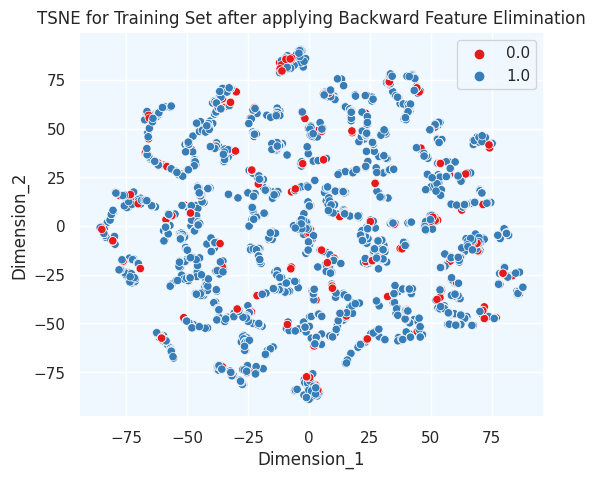

In [70]:
draw_TSNE(X_train_selected_knn , Y_train , "Set1",'TSNE for Training Set after applying Backward Feature Elimination')

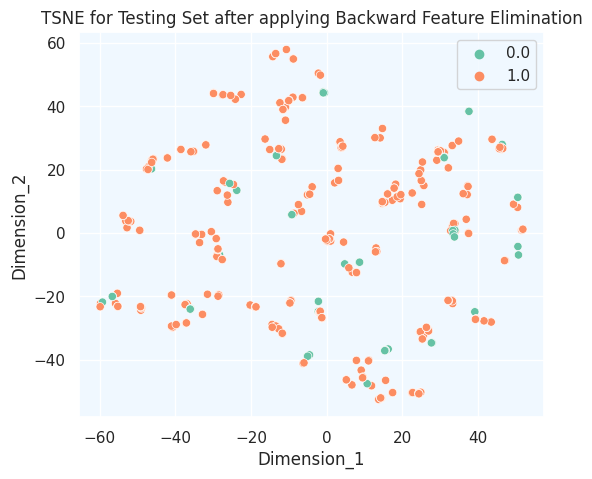

In [71]:
draw_TSNE(X_test_selected_knn , Y_test , "Set2",'TSNE for Testing Set after applying Backward Feature Elimination')

# 4) clustering based methods

## a- Apply Kmeans

In [43]:
X_train = train_data.iloc[: , 0 : -1 ]
X_test = test_data.iloc[: , 0 : -1 ]
Y_train = train_data.iloc[: , -1]
Y_test = test_data.iloc[: , -1]
KM_X_train = X_train.iloc[: , 0 : 2 ].values
KM_X_test = X_test.iloc[: , 0 : 2 ].values
KM_Y_train = Y_train.values
KM_Y_test = Y_test.values

In [44]:
KM_X_train

array([[ 45.44214189, -75.30336925],
       [ 45.44215414, -75.30436606],
       [ 45.44210414, -75.30396326],
       ...,
       [ 45.43668191, -75.15241626],
       [ 45.43697773, -75.15327778],
       [ 45.43698288, -75.15324014]])

In [45]:
from sklearn.cluster import KMeans


def kmeans(X_train , Y_train , label):
  num_clusters = [8, 12,16,20,32]
  counts = []

  for num_cluster in num_clusters:
      cluster_labels = {}
      kmeans = KMeans(n_clusters=num_cluster, random_state=0)
      kmeans.fit(X_train)
      labels = kmeans.labels_
      legitimate_only_count = 0

      for cluster in range(num_cluster):
          cluster_indices = np.where(labels == cluster)[0]
          if cluster_indices.size > 0:  # Check if cluster has any assigned data points
              labels_in_cluster = Y_train[cluster_indices]
              label_counts = np.bincount(labels_in_cluster)
              most_frequent_label = label_counts.argmax()
              cluster_labels[(num_cluster, cluster)] = {'True Label': most_frequent_label, 'Label Value Counts': label_counts}

      count = 0
      for data in cluster_labels.values():
          label_counts = data['Label Value Counts']
          if label_counts[0] == 0:
              count += label_counts[1]
      counts.append(count)

  print("Sum of legitimate only Members : " , counts)

  plt.figure(figsize=(10, 5))
  plt.plot(num_clusters, counts, marker = "." ,label='K-means')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Total Number of Legitimate Only Members')
  plt.title(f'KMEANS Algorithm for {label}')
  plt.legend()
  plt.xticks(num_clusters)
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Sum of legitimate only Members :  [1573, 2679, 3420, 3965, 4740]


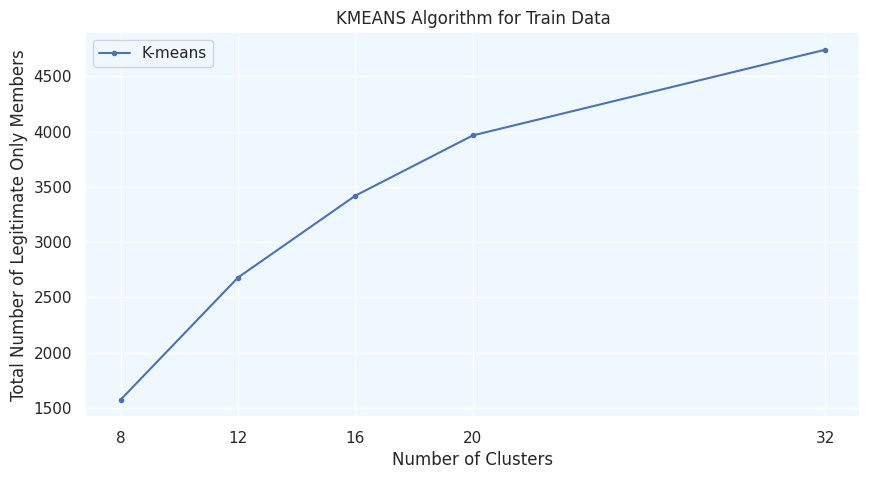

In [46]:
kmeans(KM_X_train  , KM_Y_train , "Train Data")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Sum of legitimate only Members :  [497, 978, 1179, 1376, 1713]


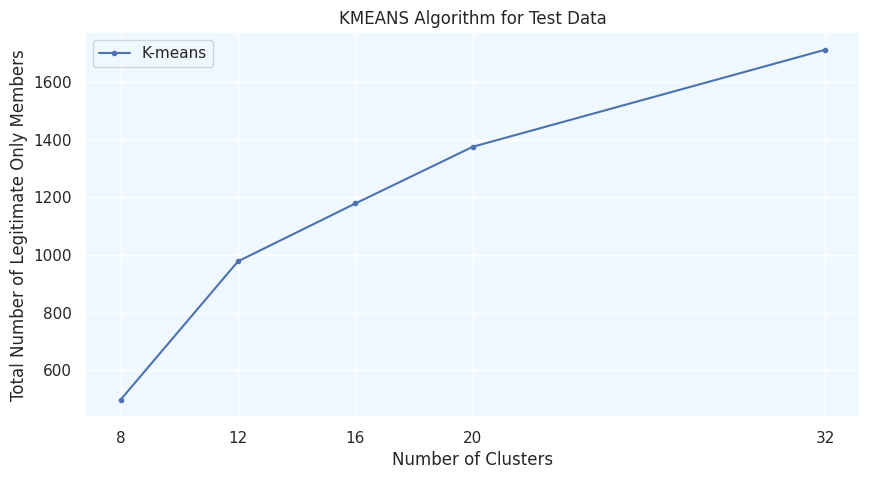

In [47]:
kmeans(KM_X_test  , KM_Y_test , "Test Data")

## b- Apply SOFM

In [48]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=cd2980856e0bf91308322de52d10cce67a2b2a73bbb2a4f73f216b07022c049c
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [49]:
from minisom import MiniSom


def sofm(X_train, Y_train , label):
    num_clusters = [8, 12, 16, 20, 32]
    counts = []

    for num_cluster in num_clusters:
        cluster_labels = {}
        som = MiniSom(num_cluster, 1, X_train.shape[1], sigma=1.0, learning_rate=0.5)
        som.random_weights_init(X_train)
        som.train_batch(X_train, 100)

        for i, x in enumerate(X_train):
            winning_cluster = som.winner(x)[0]
            if winning_cluster in cluster_labels:
                cluster_labels[winning_cluster]['Label Value Counts'][Y_train[i]] += 1
            else:
                label_counts = [0, 0]
                label_counts[Y_train[i]] = 1
                cluster_labels[winning_cluster] = {'True Label': Y_train[i], 'Label Value Counts': label_counts}

        count = 0
        for data in cluster_labels.values():
            label_counts = data['Label Value Counts']
            if label_counts[0] == 0:
                count += label_counts[1]
        counts.append(count)

    print("Sum of legitimate only Members: ", counts)

    plt.figure(figsize=(10, 5))
    plt.plot(num_clusters, counts, marker=".", label='SOFM')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Number of Legitimate Only Members')
    plt.title(f'Self Organizing Feature Map for {label}')
    plt.legend()
    plt.xticks(num_clusters)
    plt.show()


/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Sum of legitimate only Members:  [1049, 2481, 2829, 3016, 3420]


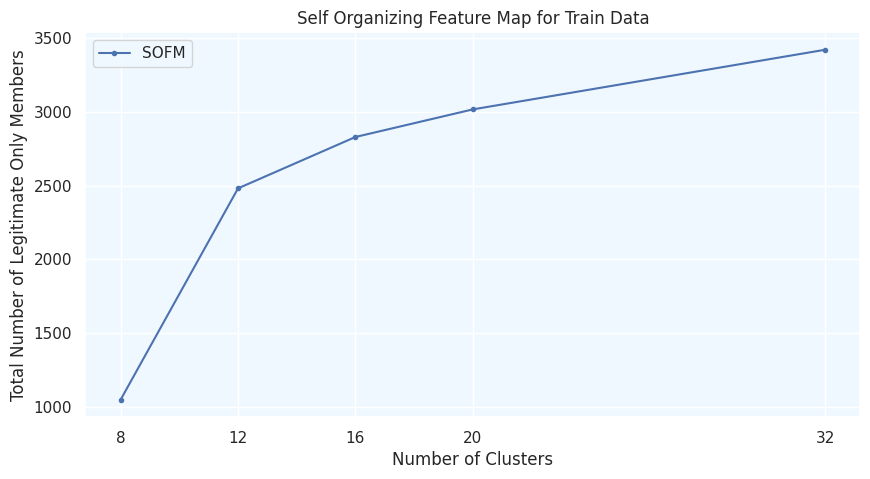

In [50]:
sofm(KM_X_train, KM_Y_train , "Train Data")

Sum of legitimate only Members:  [326, 667, 1127, 1100, 1488]


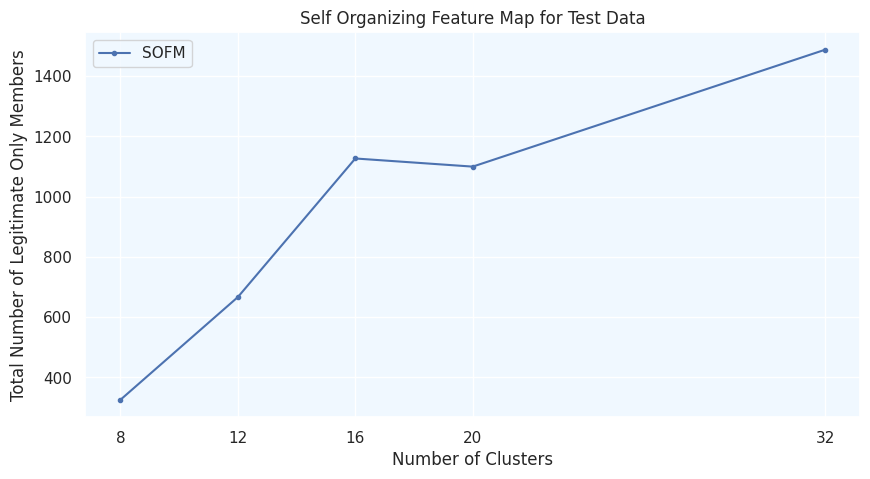

In [51]:
sofm(KM_X_test, KM_Y_test , "Test Data")

## c- Apply DBSCAN

In [52]:
X_train = train_data.iloc[: , 0 : -1 ]
X_test = test_data.iloc[: , 0 : -1 ]
Y_train = train_data.iloc[: , -1]
Y_test = test_data.iloc[: , -1]
DB_X_train = X_train.iloc[: , 0 : 2 ]
DB_X_test = X_test.iloc[: , 0 : 2 ]
DB_Y_train = Y_train.astype(int).values
DB_Y_test = Y_test.astype(int).values

In [53]:
DB_X_train

,Latitude,Longitude
0,45.442142,-75.303369
1,45.442154,-75.304366
2,45.442104,-75.303963
3,45.441868,-75.303577
4,45.447727,-75.147722
...,...,...
14479,45.445303,-75.165596
14480,45.445574,-75.165168
14481,45.436682,-75.152416
14482,45.436978,-75.153278


In [54]:
from sklearn.cluster import DBSCAN

def dbscan(X_train, Y_train , label):
  eps_values = [0.006,0.007,0.008,0.009,0.01]
  counts = []
  num_clusters_list = []

  for eps in eps_values:
      cluster_labels = {}
      dbscan = DBSCAN(eps=eps)
      dbscan.fit(X_train)
      labels = dbscan.labels_
  # print(labels)
      num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Count the number of clusters (excluding noise)
      num_clusters_list.append(num_clusters)
      unique_labels = np.unique(labels)
      if num_clusters > 0:
          for cluster in range(num_clusters):
              cluster_indices = np.where(labels == cluster)[0]
              labels_in_cluster = Y_train[cluster_indices]
              label_counts = np.bincount(labels_in_cluster)
              most_frequent_label = label_counts.argmax()
              cluster_labels[(eps, cluster)] = {'True Label': most_frequent_label, 'Label Value Counts': label_counts}

      count = 0
      for data in cluster_labels.values():
          label_counts = data['Label Value Counts']
          if label_counts[0] == 0:
              count += label_counts[1]
      counts.append(count)

  print("Number of Clusters for each EPS : " , num_clusters_list)
  print("Sum of legitimate only Members : " , counts)

  plt.figure(figsize=(10, 5))
  plt.plot(eps_values, counts, marker=".", label='DBSCAN')
  plt.xlabel('Epsilon (eps)')
  plt.ylabel('Total Number of Legitimate Only Members')
  plt.title(f'DBSCAN for {label}')
  plt.legend()
  plt.xticks(eps_values)
  plt.show()


Number of Clusters for each EPS :  [44, 17, 13, 9, 4]
Sum of legitimate only Members :  [601, 140, 116, 72, 24]


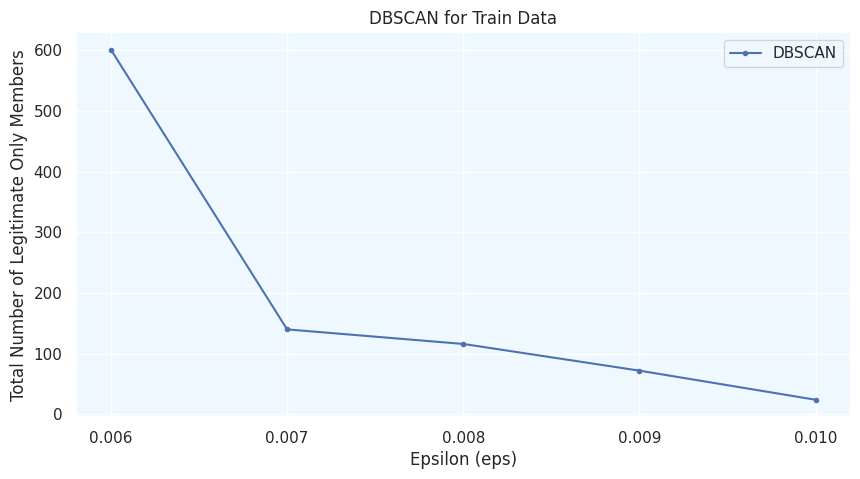

In [55]:
dbscan(DB_X_train,DB_Y_train , "Train Data")

Number of Clusters for each EPS :  [116, 79, 48, 27, 18]
Sum of legitimate only Members :  [1704, 1634, 1196, 662, 187]


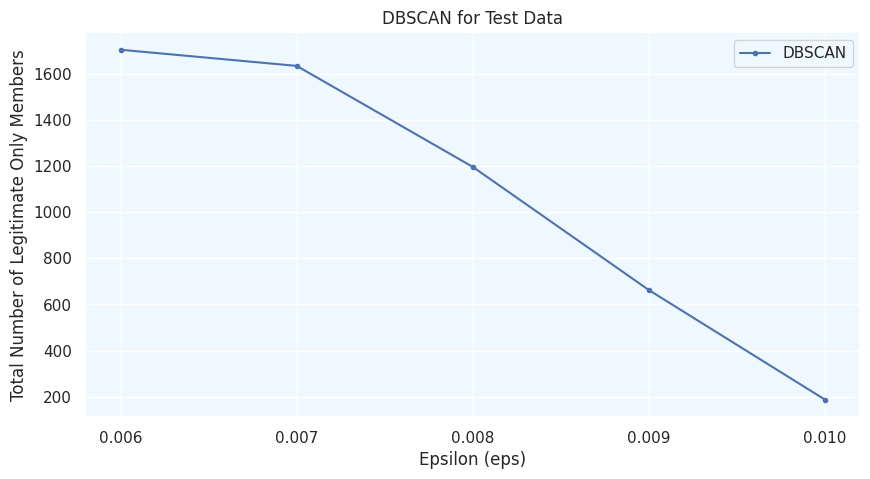

In [56]:
dbscan(DB_X_test,DB_Y_test , "Test Data")